In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.optimize import fsolve

MeV  = 1.
m    = 1.
s    = 1.

eV   = 1e-6*MeV
GeV  = 1e9*eV
keV  = 10**3*eV
MeV  = 10**6*eV
kg   = (1.78e-36)**-1*eV
g    = 10**-3*kg
amu  = 931.494*MeV

yr   = 365*24*60*60*s
cm   = m*10**-2
km   = cm*10**5

c    = 3e8*m/s

#atomic mass number of Xe
A_Xe = 131.293
#molar mass of Xe
M_Xe = A_Xe*g
#atomic mass of Xe
m_Xe = A_Xe*amu
#bulk mass of Xe
m_Xe_bulk = 500*kg
#Avogadro constant
N_A  = 6.02214086e23
#minimum recoil energy for detection
E_R_low = 3*keV
#proton mass
m_p = 938.272*MeV
#observational duration
t_obs = 1*yr
#dark matter most probable velocity
v_0 = 220*km/s
#dark matter particle average velocity
v_av = 2*v_0/np.sqrt(np.pi)
#dark matter density
rho_DM = 0.3*GeV/cm**3

$500$ kg of Xenon

$1$ yr of observation time

$E_R>3$ keV

We need to find $\sigma_{SI}$ such that the expected number of events is $3$ which corresponds to a 95% confidence level upper limit



In [13]:
#calculate the expected 95% C.L. upper limits on the WIMP-proton coupling
#cross-sections as function of the dark matter mass

#calculate reduced mass
def mu(m_DM):
    return m_DM*m_Xe/(m_DM + m_Xe)


#calculate WIMP-Xenon coupling cross-section
def sigma_DM(m_DM, sigma_SI):
    return sigma_SI*(mu(m_DM)**2*A_Xe**2)/(m_p**2)


#calculate 0-order interation rate:
def R_0(m_DM, sigma):
    return (N_A)/(M_Xe)*(rho_DM/m_DM)*sigma*v_av


def dRdE_R(m_DM, sigma, E_R):
    R_0_const = R_0(m_DM,sigma)
    E_0 = (1/2)*m_DM*(v_0/c)**2
    r = 4*mu(m_DM)**2/(m_DM*m_Xe)
    exponent = -E_R/(r*E_0)
    return (R_0_const/(r*E_0))*np.exp(exponent)
    

def N_events(m_DM, sigma_SI):
    sigma_const = sigma_DM(m_DM, sigma_SI)
    integrand = lambda E_R: dRdE_R(m_DM, sigma_const, E_R)
    R = quad(integrand, E_R_low, np.inf)
    #print(R)
    return R[0]*m_Xe_bulk*t_obs


def sigma_SI_solver(m_DM):
    equation = lambda sigma_SI: N_events(m_DM, sigma_SI)-3.
    guess = 1e-46*cm**2
    return fsolve(equation, guess)

m_DM = 100*GeV
sigma_test = 1e-46*cm**2
E_R_test = 30*keV

#print(R_0(m_DM,sigma_test)*yr*kg)  # for testing. should be =0.1

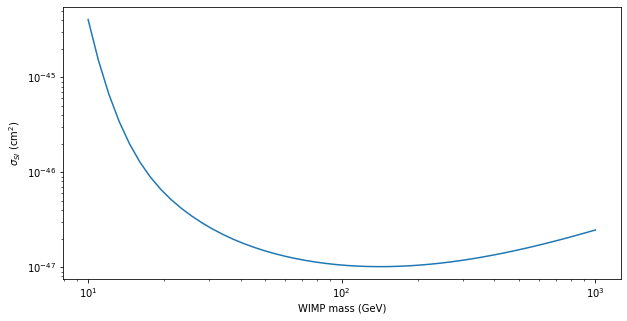

In [14]:
WIMP_mass_vect = np.logspace(1, 3)*GeV
sigma_SI_vect = []
for mass in WIMP_mass_vect:
    sigma_SI_vect.append(sigma_SI_solver(mass)/(cm**2))
plt.figure(figsize=(10,5))
plt.plot(WIMP_mass_vect*GeV**-1, sigma_SI_vect)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\sigma_{SI}$ (cm$^2$)')
plt.xlabel(r'WIMP mass (GeV)')
plt.show()

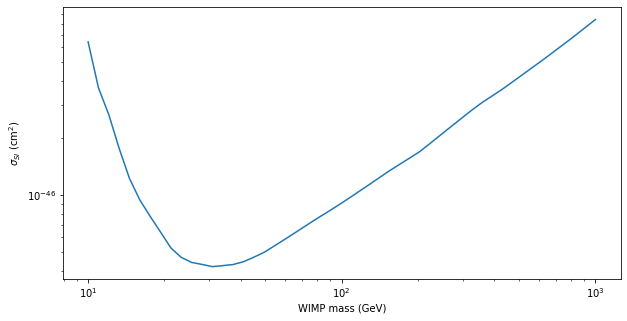

In [4]:
sigma_SI_data = np.genfromtxt('sigmaSI.csv', delimiter=',')
                             
sigma_SI=interp1d(sigma_SI_data[:,0]*GeV,sigma_SI_data[:,1]*cm**2,kind='linear',fill_value='extrapolate')
WIMP_mass_vect = np.logspace(1, 3)*GeV           
plt.figure(figsize=(10,5))
plt.plot(WIMP_mass_vect*GeV**-1, sigma_SI(WIMP_mass_vect)*cm**-2)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\sigma_{SI}$ (cm$^2$)')
plt.xlabel(r'WIMP mass (GeV)')
plt.show()